# Read FTT Cone Calorimeter Result Files

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('Package Versions')
print('----------------')
print('Pandas version: {}'.format(pd.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))

Package Versions
----------------
Pandas version: 0.24.1
Numpy version: 1.15.4
Matplotlib version: 3.0.2


In [3]:
cwd = os.getcwd()
print(cwd)

D:\Git\UsefulStuff\LabEquipment\ConeFTT


In [4]:
# Define general information needed within this notebook.

# Location of experimental data files.
exp_data_dir = os.path.join("ExperimentalData")
# Experimental data file names.
exp_data_files = ["20170707_1235_50kW_C05_1L_red.csv", 
                  "20170707_1235_50kW_C05_1L.csv"]

# Define the delimiter used in the csv file, e.g. "\t", ",", ...
csv_delimiter = ","


# Read the "red" Files

The special symbols used in the files are somewhat annoying. Thus, they are removed in the following block, before further steps are taken for any data analysis.

In [5]:
# Read a single line of the csv file to extract the column labels as a list.
red_file = os.path.join(exp_data_dir, exp_data_files[0])
column_labels_original=list(pd.read_csv(red_file, delimiter=csv_delimiter, 
                                        encoding='cp1250', header=1, nrows=1))

column_labels = list()
# Remove the squared symbol.
for i, val in enumerate(column_labels_original):
    if "˛" in val:
        column_labels.append(val.replace("˛", "2"))
    else:
        column_labels.append(val)

# Remove the multiplication (dot) symbol.
for i, val in enumerate(column_labels):    
    if "·" in val:
        column_labels[i]=val.replace("·", "")

In [6]:
# Column labels as provided within the csv file.
column_labels_original

['Parameter',
 'Value',
 'Time (s)',
 'HRR (kW/m˛)',
 'EHC (MJ/kg)',
 'SEA (m˛/kg)',
 'MLR (g/s)',
 'Specific MLR (g/s·m˛)',
 'COY (kg/kg)',
 'CO2Y (kg/kg)',
 'THR (MJ/m˛)',
 'MFR (g/s)',
 'k (1/m)',
 'V stack (l/s)',
 'V smoke (l/s)',
 'SPR (m˛/s)',
 'RSR ((m˛/s)/m˛)',
 'TSP (m˛)',
 'TSR (m˛/m˛)',
 'COP (g/s)',
 'CO2P (g/s)',
 'O2C (g/s)',
 'TOC (g)',
 'ARHE(kW/m˛)',
 'Specimen mass (g)']

In [7]:
# Adjusted column labels for better usage.
column_labels

['Parameter',
 'Value',
 'Time (s)',
 'HRR (kW/m2)',
 'EHC (MJ/kg)',
 'SEA (m2/kg)',
 'MLR (g/s)',
 'Specific MLR (g/sm2)',
 'COY (kg/kg)',
 'CO2Y (kg/kg)',
 'THR (MJ/m2)',
 'MFR (g/s)',
 'k (1/m)',
 'V stack (l/s)',
 'V smoke (l/s)',
 'SPR (m2/s)',
 'RSR ((m2/s)/m2)',
 'TSP (m2)',
 'TSR (m2/m2)',
 'COP (g/s)',
 'CO2P (g/s)',
 'O2C (g/s)',
 'TOC (g)',
 'ARHE(kW/m2)',
 'Specimen mass (g)']

In [8]:
# Read first part of the data, the parameter overview.
parameters = pd.read_csv(red_file, delimiter=csv_delimiter, encoding='cp1250', header=1, 
                         usecols=column_labels_original[:2]).dropna(how='all')

parameters

,Parameter,Value
0,Peaks,NaN
1,peak HRR (kW/m˛),224.093411
2,peak EHC (MJ/kg),76.487338
3,peak MLR (g/s),0.593496
4,peak SEA (m˛/kg),4704.117877
5,peak COY (kg/kg),5.172440
6,peak CO2Y (kg/kg),405.538638
8,Time To Peaks,NaN
9,t peak HRR (s),589.000000
10,t peak EHC (s),473.000000


In [9]:
# Read the second part, the different data series.
exp_data = pd.read_csv(red_file, delimiter=csv_delimiter, encoding='cp1250',
                       header=1, usecols=column_labels_original[2:])

# Renaming columns.
for i_orig, orig_label in enumerate(column_labels_original):
    exp_data.rename(columns={orig_label: column_labels[i_orig]}, inplace=True)

# Provide overview over the data.
exp_data.head()

,Time (s),HRR (kW/m2),EHC (MJ/kg),SEA (m2/kg),MLR (g/s),Specific MLR (g/sm2),COY (kg/kg),CO2Y (kg/kg),THR (MJ/m2),MFR (g/s),...,SPR (m2/s),RSR ((m2/s)/m2),TSP (m2),TSR (m2/m2),COP (g/s),CO2P (g/s),O2C (g/s),TOC (g),ARHE(kW/m2),Specimen mass (g)
0,0,1.004885,0.010003,-0.412620,0.888066,100.460011,0.000010,0.000670,0.000000,26.533481,...,-0.000366,-0.041452,0.0,0.0,0.000009,0.000595,0.000530,0.000000,0.000000,106.400000
1,1,0.821132,0.000000,0.000000,-0.501073,-56.682523,0.000000,0.000000,0.000913,26.157299,...,-0.000197,-0.022303,0.0,0.0,0.000017,0.000394,0.000404,0.000467,0.913008,106.414472
2,2,0.578730,0.000000,0.000000,-0.171946,-19.450848,0.000000,0.000000,0.001613,26.098765,...,-0.000163,-0.018419,0.0,0.0,0.000014,0.000467,0.000282,0.000811,0.806470,106.829391
3,3,0.486264,0.032893,-2.956775,0.130683,14.783201,0.000055,0.003044,0.002145,26.487838,...,-0.000386,-0.043711,0.0,0.0,0.000007,0.000398,0.000217,0.001061,0.715145,106.703843
4,4,0.344294,0.042523,-2.747240,0.071574,8.096597,0.000069,0.004350,0.002561,26.517612,...,-0.000197,-0.022243,0.0,0.0,0.000005,0.000311,0.000126,0.001233,0.640179,106.651622


Text(0, 0.5, 'Specimen mass (g)')

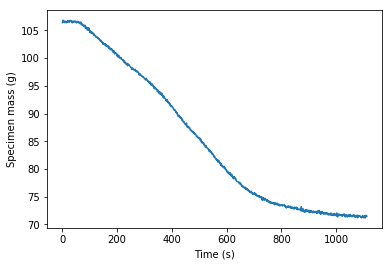

In [10]:
# Little plot for fun...

# Note: Column labels as string can be used to query colums.
x_data = "Time (s)"
y_data = "Specimen mass (g)"

# Prepare the plot.
plt.plot(exp_data[x_data], 
         exp_data[y_data])

plt.xlabel(x_data)
plt.ylabel(y_data)

## Write Data to CSV file

Take some of the above data and write them to a separate CSV file.

In [24]:
exp_data_extract_df = pd.concat([exp_data['Time (s)'],
                                 exp_data['HRR (kW/m2)'],
                                 exp_data['MLR (g/s)'],
                                 exp_data['Specimen mass (g)']],
                                axis=1,
                                keys=['Time (s)', 'HRR (kW/m2)',
                                      'MLR (g/s)', 'Specimen mass (g)'])
exp_data_extract_df = exp_data_extract_df.set_index('Time (s)')
exp_data_extract_df.head()

,HRR (kW/m2),MLR (g/s),Specimen mass (g)
Time (s),,,
0,1.004885,0.888066,106.400000
1,0.821132,-0.501073,106.414472
2,0.578730,-0.171946,106.829391
3,0.486264,0.130683,106.703843
4,0.344294,0.071574,106.651622


In [25]:
# # Save extracted data as CSV file.
# extract_file_name = os.path.join("ExperimentalData", 
#                                  "ConeExtract.csv")
# exp_data_extract_df.to_csv(extract_file_name, 
#                            sep=',', encoding='utf-8')

# Read the "base" Files

The special symbols used in the files are somewhat annoying. Thus, they are removed in the following block, before further steps are taken for any data analysis.

In [11]:
# Read a single line of the csv file to extract the column labels as a list.
base_file = os.path.join(exp_data_dir, exp_data_files[1])
column_labels_base_original=list(pd.read_csv(base_file, delimiter=csv_delimiter, 
                                        encoding='cp1250', header=0, nrows=1))

column_labels_base = list()
# Remove the squared symbol.
for i, val in enumerate(column_labels_base_original):
    if "˛" in val:
        column_labels_base.append(val.replace("˛", "2"))
    else:
        column_labels_base.append(val)

# Remove the multiplication (dot) symbol.
for i, val in enumerate(column_labels_base):    
    if "·" in val:
        column_labels_base[i]=val.replace("·", "")

In [12]:
# Column labels as provided within the csv file.
column_labels_base_original

['General information',
 'Unnamed: 1',
 'time (s)',
 'O2 (%)',
 'DPT (Pa)',
 'CO (%)',
 'CO2 (%)',
 'PDM (-)',
 'PDC (-)',
 'Mass (g)',
 'Methane MFM (slpm)',
 'APT (kPa)',
 'HFM (kW/m2)',
 'Cold Trap TC (K)',
 'Stack TC (K)',
 'Smoke TC (K)',
 'Cone Heater TC (K)',
 'Spare TC (K)',
 'Soot MFM (g/s)']

In [13]:
# Adjusted column labels for better usage.
column_labels_base

['General information',
 'Unnamed: 1',
 'time (s)',
 'O2 (%)',
 'DPT (Pa)',
 'CO (%)',
 'CO2 (%)',
 'PDM (-)',
 'PDC (-)',
 'Mass (g)',
 'Methane MFM (slpm)',
 'APT (kPa)',
 'HFM (kW/m2)',
 'Cold Trap TC (K)',
 'Stack TC (K)',
 'Smoke TC (K)',
 'Cone Heater TC (K)',
 'Spare TC (K)',
 'Soot MFM (g/s)']

In [14]:
# Read first part of the data, the parameter overview.
general_info = pd.read_csv(base_file, delimiter=csv_delimiter, encoding='cp1250', header=0,
                           usecols=column_labels_base_original[:2]).dropna(how='all')

general_info

,General information,Unnamed: 1
0,Test,NaN
1,Standard used,ISO 5660-1
2,Date of test,07/07/2017
3,Time of test,12:42
4,Heat flux (kW/mďż˝),50
5,Nominal duct flow rate (l/s),24
6,Sampling interval (s),1
7,Separation (mm),25
8,Orientation,Horizontal
9,Edge frame?,Yes


In [15]:
# Read the second part, the different data series.
data_series_base = pd.read_csv(base_file, delimiter=csv_delimiter, encoding='cp1250',
                               header=0, usecols=column_labels_base_original[2:])

# Renaming columns.
for i_orig, orig_label in enumerate(column_labels_base_original):
    data_series_base.rename(columns={orig_label: column_labels_base[i_orig]}, inplace=True)

# Provide overview over the data.
data_series_base.head()

,time (s),O2 (%),DPT (Pa),CO (%),CO2 (%),PDM (-),PDC (-),Mass (g),Methane MFM (slpm),APT (kPa),HFM (kW/m2),Cold Trap TC (K),Stack TC (K),Smoke TC (K),Cone Heater TC (K),Spare TC (K),Soot MFM (g/s)
0,0,20.949054,113.772542,-0.001356,0.042078,0.999441,0.997090,106.613371,-0.0053,100.5067,0,277.435,328.051,330.199,1021.856,0,0
1,1,20.948502,120.338361,-0.001326,0.041995,0.998580,0.997097,106.613371,-0.0052,100.5075,0,277.452,328.029,330.186,1021.943,0,0
2,2,20.947951,126.904179,-0.001295,0.041913,0.997720,0.997104,106.613371,-0.0051,100.5084,0,277.468,328.008,330.172,1022.031,0,0
3,3,20.949567,124.783316,-0.001203,0.041996,0.999300,0.997133,106.613371,-0.0051,100.5083,0,277.471,328.021,330.168,1022.049,0,0
4,4,20.950311,131.258609,-0.001136,0.042379,0.997317,0.997112,106.613371,-0.0051,100.5085,0,277.465,328.023,330.193,1022.239,0,0


Text(0, 0.5, 'Mass (g)')

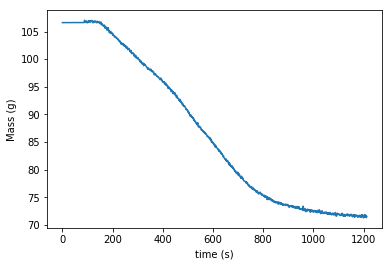

In [16]:
# Little plot for fun...

# Note: Column labels as string can be used to query colums.
x_data = "time (s)"
y_data = "Mass (g)"

# Prepare the plot.
plt.plot(data_series_base[x_data], 
         data_series_base[y_data])

plt.xlabel(x_data)
plt.ylabel(y_data)